# Selection of Ensemble Techniques - A case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

m1 = tree.DecisionTreeClassifier()
m2 = BaggingClassifier()
m3 = AdaBoostClassifier()


# Model performance function   
def model_performance(model):
    model.fit(X_train,y_train)
    RF_training_labels = model.predict(X_train)
    RF_test_labels = model.predict(X_test)
    Training_accuracy = model.score(X_train, y_train, sample_weight=None)
    Test_accuracy = model.score(X_test, y_test, sample_weight=None)
    F1_score_train = f1_score(y_train, RF_training_labels, average = 'weighted')
    F1_score_test = f1_score(y_test, RF_test_labels, average = 'weighted')
    Recall_train = recall_score(y_train, RF_training_labels, average = 'weighted') 
    Recall_test  = recall_score(y_test, RF_test_labels, average = 'weighted') 
    Precision_train = precision_score(y_train, RF_training_labels, average = 'weighted')
    Precision_test = precision_score(y_test, RF_test_labels, average = 'weighted')
    accuracy_train = accuracy_score(y_train, RF_training_labels, )
    accuracy_test = accuracy_score(y_test, RF_test_labels)
    rf_cm_tr = confusion_matrix(y_train, RF_training_labels)
    rf_cm_te = confusion_matrix(y_test, RF_test_labels)
    print("Training_accuracy - ", Training_accuracy)
    print("Test_accuracy - ", Test_accuracy)
    print("F1_score_train - ", F1_score_train)
    print("F1_score_test - ", F1_score_test)
    print("Recall_train - ", Recall_train)
    print("Recall_test - ", Recall_test)
    print("Precision_train - ", Precision_train)
    print("Precision_test - ", Precision_test)
    #Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(rf_cm_te), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Test Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


## Building our model for the wine dataset

Training_accuracy -  1.0
Test_accuracy -  0.9444444444444444
F1_score_train -  1.0
F1_score_test -  0.9447274099226561
Recall_train -  1.0
Recall_test -  0.9444444444444444
Precision_train -  1.0
Precision_test -  0.9472222222222223
None
Training_accuracy -  1.0
Test_accuracy -  0.9444444444444444
F1_score_train -  1.0
F1_score_test -  0.9447274099226561
Recall_train -  1.0
Recall_test -  0.9444444444444444
Precision_train -  1.0
Precision_test -  0.9472222222222223
None
Training_accuracy -  0.971830985915493
Test_accuracy -  0.9722222222222222
F1_score_train -  0.9719712913496303
F1_score_test -  0.9723780582826866
Recall_train -  0.971830985915493
Recall_test -  0.9722222222222222
Precision_train -  0.974228348816302
Precision_test -  0.9745370370370369
None


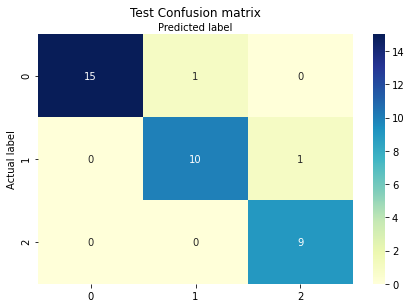

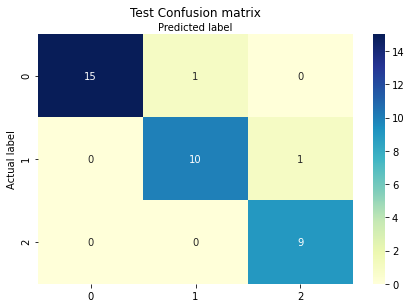

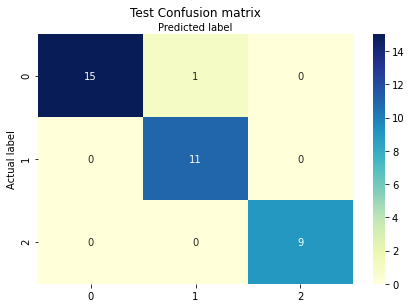

In [2]:
wine = load_wine() #our dataset
df = pd.DataFrame(wine.data)
df.head()
df['target'] = wine.target
df[0:10]

X = df.drop('target',axis='columns')
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

len(X_train)
len(X_test)

models=[m1,m2,m3]

for i in range(0,len(models)):
   print(model_performance(models[i]))


In [3]:
# now lets focus on the stacking classifier we will combine the following classifers
# for the stacking classifiers we will use 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('KNN',KNeighborsClassifier(),
      'GNB',GaussianNB())
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
print(clf.fit(X_train, y_train).score(X_train, y_train),clf.fit(X_train, y_train).score(X_test, y_test))



1.0 1.0


In [4]:
df.shape

(178, 14)

## Building out model for the iris dataset

Training_accuracy -  1.0
Test_accuracy -  0.9666666666666667
F1_score_train -  1.0
F1_score_test -  0.9667246376811593
Recall_train -  1.0
Recall_test -  0.9666666666666667
Precision_train -  1.0
Precision_test -  0.9694444444444444
None
Training_accuracy -  0.9833333333333333
Test_accuracy -  0.9666666666666667
F1_score_train -  0.9833101851851853
F1_score_test -  0.9667246376811593
Recall_train -  0.9833333333333333
Recall_test -  0.9666666666666667
Precision_train -  0.9841463414634146
Precision_test -  0.9694444444444444
None
Training_accuracy -  0.9583333333333334
Test_accuracy -  0.9666666666666667
F1_score_train -  0.9583116582856482
F1_score_test -  0.9667246376811593
Recall_train -  0.9583333333333334
Recall_test -  0.9666666666666667
Precision_train -  0.9584953703703704
Precision_test -  0.9694444444444444
None


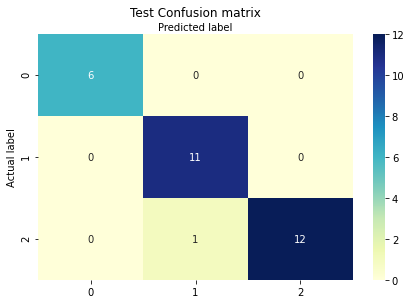

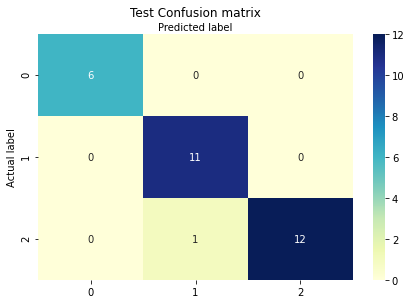

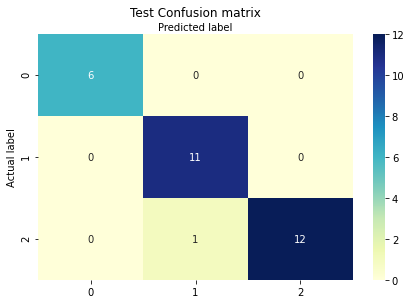

In [5]:
iris = load_iris() #our dataset
df = pd.DataFrame(iris.data)
df.head()
df['target'] = iris.target
df[0:10]

X = df.drop('target',axis='columns')
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

len(X_train)
len(X_test)

models=[m1,m2,m3]

for i in range(0,len(models)):
   print(model_performance(models[i]))



In [6]:
# now lets focus on the stacking classifier we will combine the following classifers
# for the stacking classifiers we will use 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('KNN',KNeighborsClassifier(),
      'GNB',GaussianNB())
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
print(clf.fit(X_train, y_train).score(X_train, y_train),clf.fit(X_train, y_train).score(X_test, y_test))



0.9833333333333333 0.9666666666666667


In [7]:
df.shape

(150, 5)

## Building our model for the digits dataset

Training_accuracy -  1.0
Test_accuracy -  0.8555555555555555
F1_score_train -  1.0
F1_score_test -  0.8555033870693314
Recall_train -  1.0
Recall_test -  0.8555555555555555
Precision_train -  1.0
Precision_test -  0.8606892588179959
None
Training_accuracy -  0.9965205288796103
Test_accuracy -  0.9138888888888889
F1_score_train -  0.9965202628158839
F1_score_test -  0.913050305582625
Recall_train -  0.9965205288796103
Recall_test -  0.9138888888888889
Precision_train -  0.9965294867895312
Precision_test -  0.9150052795254033
None
Training_accuracy -  0.29227557411273486
Test_accuracy -  0.24722222222222223
F1_score_train -  0.2209538841598365
F1_score_test -  0.2072498368156683
Recall_train -  0.29227557411273486
Recall_test -  0.24722222222222223
Precision_train -  0.2669994503232389
Precision_test -  0.2551436899207298
None


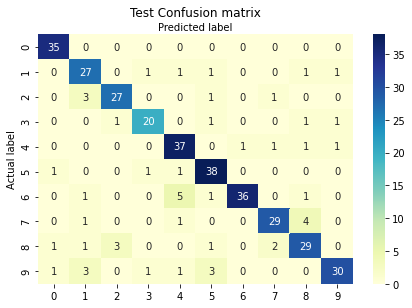

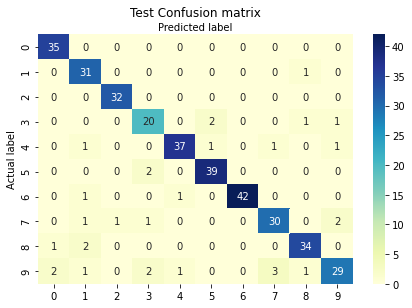

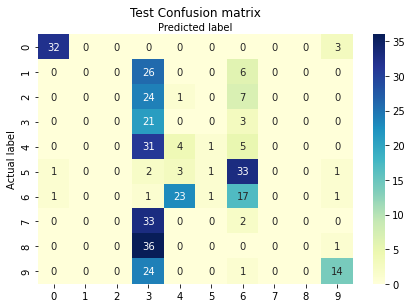

In [8]:
digits = load_digits() #our dataset
df = pd.DataFrame(digits.data)
df.head()
df['target'] = digits.target
df[0:10]

X = df.drop('target',axis='columns')
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

len(X_train)
len(X_test)

models=[m1,m2,m3]

for i in range(0,len(models)):
   print(model_performance(models[i]))



In [9]:
df.shape

(1797, 65)

In [10]:
# now lets focus on the stacking classifier we will combine the following classifers
# for the stacking classifiers we will use 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('KNN',KNeighborsClassifier(),
      'GNB',GaussianNB())
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
print(clf.fit(X_train, y_train).score(X_train, y_train),clf.fit(X_train, y_train).score(X_test, y_test))



0.9972164231036882 0.9888888888888889
